# Building an Image Classifier with Keras

## 1. Introductie tot Keras

Keras is een high-level Deep Learning API waarmee je eenvoudig neurale netwerken kunt bouwen, trainen en uitvoeren.

- **Backend:** Standaard gebaseerd op TensorFlow, maar ondersteunt ook PyTorch en JAX.
- **Ecosysteem:** De API lijkt sterk op die van PyTorch (beiden geïnspireerd door Scikit-Learn), wat overstappen vergemakkelijkt.

## 2. De Data: Fashion MNIST

We gebruiken **Fashion MNIST**, een uitdagendere vervanger voor de standaard MNIST-cijfers.

- **Inhoud:** 70.000 grijswaardenafbeeldingen van 28x28 pixels.
- **Klassen:** 10 verschillende mode-items (T-shirt, broek, etc.).
- **Moeilijkheidsgraad:** Waar een lineair model op MNIST 92% haalt, bereikt het op Fashion MNIST slechts circa 83%.

In [2]:
import keras
import matplotlib.pyplot as plt

# Laden van de dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Training- en validatieset splitsen
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Rescaling naar waarden tussen 0 en 1
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 3. Model Architectuur (Sequential API)

De `Sequential` API is een enkele stapel lagen die sequentieel verbonden zijn.

### Constructie van het model

Je kunt lagen één voor één toevoegen of als een lijst meegeven:

In [4]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),          # Input laag (28x28 pixels)
    keras.layers.Flatten(),                      # Maakt van 2D een 1D array (geen parameters)
    keras.layers.Dense(300, activation="relu"),  # Volledig verbonden laag met 300 neuronen
    keras.layers.Dense(100, activation="relu"),  # Volledig verbonden laag met 100 neuronen
    keras.layers.Dense(10, activation="softmax") # Output laag (10 klassen, exclusief)
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### Parameters en Initialisatie

- **Aantal Parameters:** De eerste verborgen laag alleen al heeft $784 \times 300 + 300 = 235.500$ parameters. Dit maakt het model flexibel maar verhoogt het risico op overfitting.
- **Initialisatie:** Verbindingsgewichten (weights) worden willekeurig geïnitialiseerd om symmetrie te doorbreken; biastermen beginnen op nul.
- **Inspectie:** Gebruik `model.summary()` voor een overzicht of `model.layers[i].get_weights()` om specifieke gewichten op te vragen.

## 4. Compiling the Model

Voordat je traint, definieer je de "spelregels" via `compile()`.

In [5]:
model.compile(
    loss="sparse_categorical_crossentropy", # Gebruik bij sparse labels (index 0-9)
    optimizer="sgd",                        # Stochastic Gradient Descent
    metrics=["accuracy"]                    # Meet de nauwkeurigheid
)

> Tip: Gebruik categorical_crossentropy als je labels al One-Hot encoded zijn (bijv. via keras.utils.to_categorical).

## 5. Training en Evaluatie

Het trainen gebeurt met de `fit()` methode.

In [6]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid) # Om overfitting te detecteren
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.7639 - loss: 0.7114 - val_accuracy: 0.8236 - val_loss: 0.5056
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accuracy: 0.8331 - loss: 0.4850 - val_accuracy: 0.8410 - val_loss: 0.4511
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.8459 - loss: 0.4409 - val_accuracy: 0.8506 - val_loss: 0.4195
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.8563 - loss: 0.4123 - val_accuracy: 0.8572 - val_loss: 0.4044
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.8629 - loss: 0.3918 - val_accuracy: 0.8486 - val_loss: 0.4045
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.8668 - loss: 0.3761 - val_accuracy: 0.8680 - val_loss: 0.3747
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.8717 - loss: 0.3645 - val_accuracy: 0.8694 - val_loss: 0.3665
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.8764 -

### Leercurves Visualiseren

Het `history` object bevat alle data van de training. Door dit om te zetten naar een pandas DataFrame kun je de leercurves plotten om te zien of het model overfit.

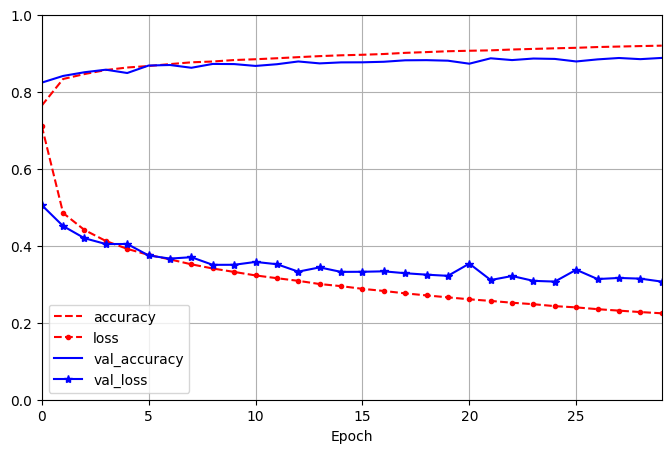

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
	figsize=(8, 5), xlim=[0, 29],
	ylim=[0, 1], grid=True,
	xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])

plt.show()

## 6.6. Evaluatie op de Test Set

**Belangrijk:** Evalueer pas op de testset als je volledig klaar bent met het tunen van je model via de validatieset.

- De eerste waarde is de **loss** (cross-entropy) op de testset.
- De tweede waarde is de **accuraatheid** op de testset.

In [8]:
# Geeft [test_loss, test_accuracy] terug
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8860 - loss: 0.3244


## 6.7. Voorspellingen Maken

Zodra je tevreden bent met de evaluatie op de testset (`model.evaluate(X_test, y_test)`), kun je nieuwe data voorspellen.

In [10]:
X_new = X_test[:3]
y_proba = model.predict(X_new)           # Geeft kansen per klasse
y_pred = y_proba.argmax(axis=-1)         # Pakt de hoogste kans

# Omzetten naar class names
import numpy as np
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(np.array(class_names)[y_pred])     # Resultaat bijv: ['Ankle boot', 'Pullover', 'Trouser']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
['Ankle boot' 'Pullover' 'Trouser']
